# Now it's the time make some tests and visualized analysis to check the full correctness of the algorithm functionality.

## Imports

In [56]:
import special_functions as sp
import dt_xgboost as dt

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import random
from pprint import pprint

## Visualization

#### It's important to be able to see our analysis visually , so we create this function that will enable us tracking of the actual and predicted values from our model.

In [57]:
def create_plot(df , tree, title):

    predictions = df.apply(dt.predict_sample, args=(tree,), axis=1)
    actual = df.label
    plot_df = pd.DataFrame({"actual": actual, "predictions": predictions})

    plot_df.plot(figsize=(18, 5), title=title)

    return

## Regression Test
- in this test we use the data set of Titanic survivals from kaggle

#### Format of the data
- the last column of the data frame must contain the label and it must also be called "label"
- there should be no missing values in the data frame

In [78]:
df = pd.read_csv("../data/Bike.csv", parse_dates=["dteday"])
df = df.drop(["instant", "casual", "registered"], axis=1)
df = df.rename({"dteday": "date"}, axis=1)
df.head()

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [79]:
df.head()
date_column = df.date

df["day_of_year"] = date_column.dt.dayofyear
df["day_of_month"] = date_column.dt.day

df["quarter"] = date_column.dt.quarter
df["week"] = date_column.dt.week

df["is_month_end"] = date_column.dt.is_month_end
df["is_month_start"] = date_column.dt.is_month_start
df["is_quarter_end"] = date_column.dt.is_quarter_end
df["is_quarter_start"] = date_column.dt.is_quarter_start
df["is_year_end"] = date_column.dt.is_year_end
df["is_year_start"] = date_column.dt.is_year_start

df = df.set_index("date")

df["label"] = df.cnt
df = df.drop("cnt", axis=1)

df.head()

C:\Users\moham\AppData\Local\Temp\ipykernel_3592\1409662364.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["week"] = date_column.dt.week


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,day_of_month,quarter,week,is_month_end,is_month_start,is_quarter_end,is_quarter_start,is_year_end,is_year_start,label
date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,...,1,1,52,False,True,False,True,False,True,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,...,2,1,52,False,False,False,False,False,False,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,...,3,1,1,False,False,False,False,False,False,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,...,4,1,1,False,False,False,False,False,False,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,...,5,1,1,False,False,False,False,False,False,1600


In [83]:
train_df = df.iloc[:-122]
val_df = df.iloc[-122:-61]  # Sep and Oct of 2012
test_df = df.iloc[-61:]     # Nov and Dec of 2012

In [61]:
print(train_df.shape)

(609, 22)


##### firt we tune our parameter to train the best tree

In [84]:
dt.dt_tune_parameters(train_df,'regression').head()

,max_depth,min_samples,r_squared_train,r_squared_val
17,6,15,0.901098,0.821091
14,5,15,0.888059,0.815937
11,4,15,0.868907,0.804127
10,4,10,0.873063,0.800834
13,5,10,0.897962,0.799807


Pick two values for the two parameters :

In [81]:
best_max_depth = 6
best_min_samples = 15

In [82]:
tree = dt.train(train_df, ml_task="regression", max_depth=best_max_depth, min_samples=best_min_samples)
dt.calculate_r_squared(test_df, tree)

0.3716133892077501

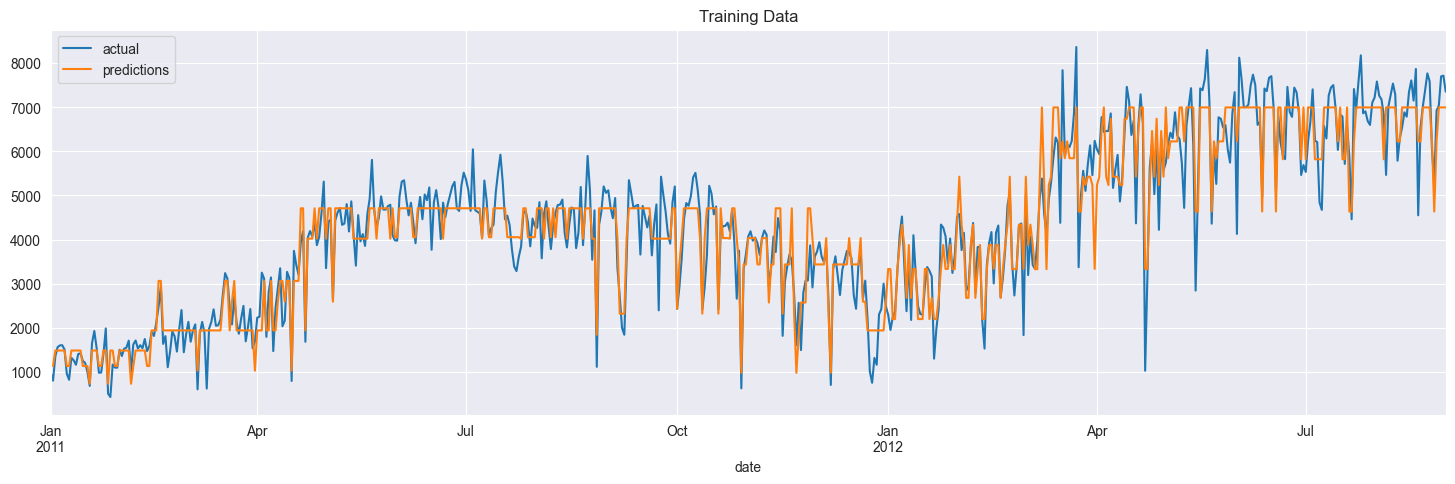

In [65]:
create_plot(train_df, tree, title="Training Data")

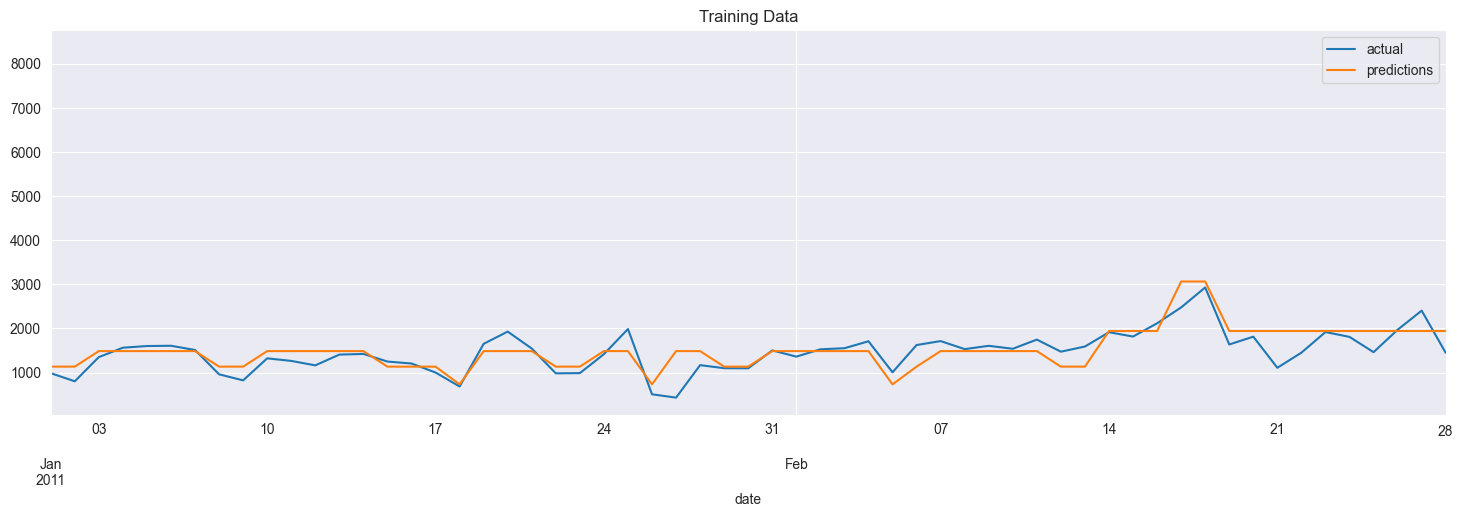

In [66]:
create_plot(train_df, tree, title="Training Data")
plt.xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2011-02-28"));

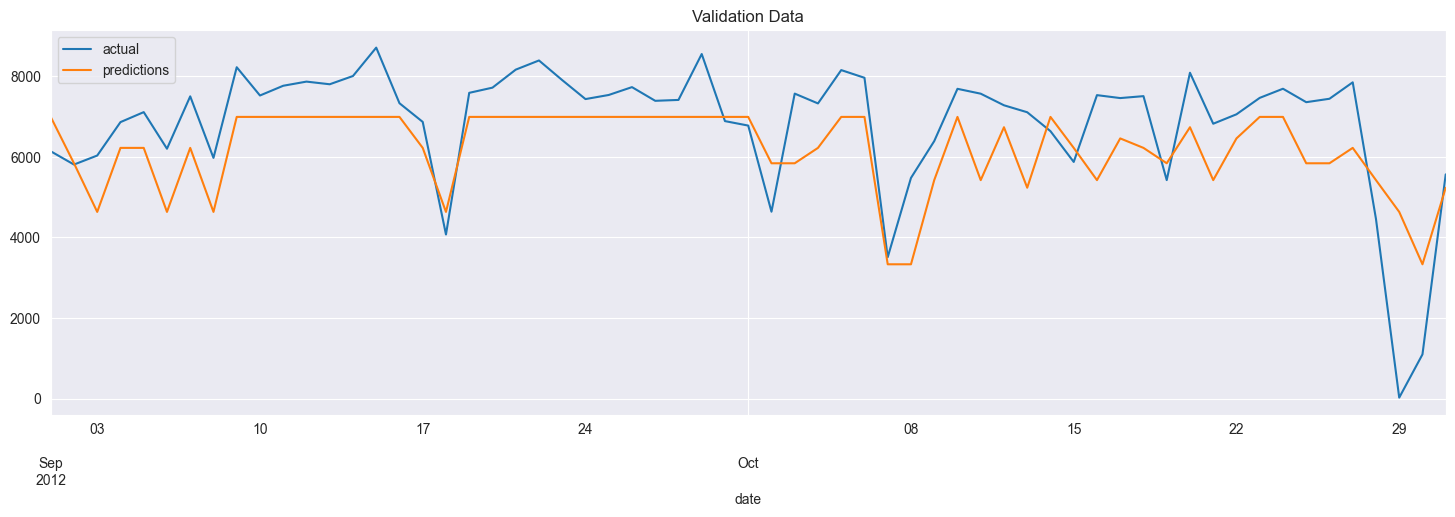

In [67]:
create_plot(val_df, tree, title="Validation Data")

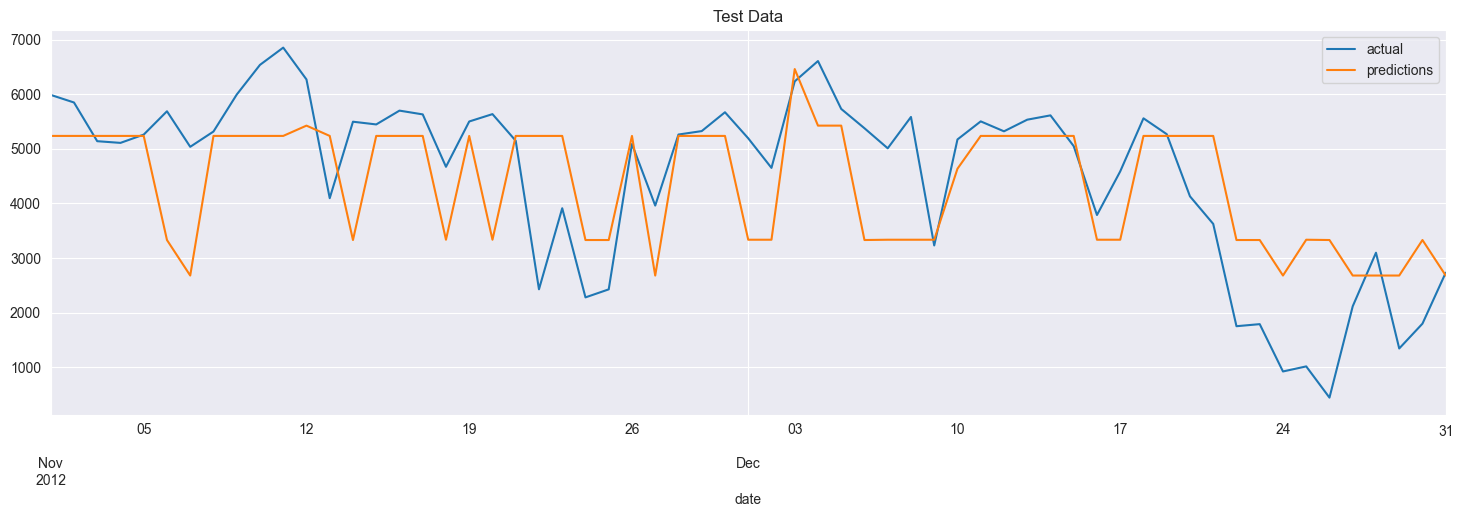

In [68]:
create_plot(test_df, tree, title="Test Data")

## Classification Test
- in this test we use the data set of Iris Flowers from kaggle

In [69]:
df = pd.read_csv("../data/Iris.csv")
df = df.drop("Id", axis=1)
df = df.rename(columns={"species": "label"})

df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
random.seed(0)
train_df , test_df = sp.train_test_split(df , test_size=0.2)

tree = dt.train(train_df, ml_task="classification", max_depth=3)

pprint(tree)

{'petal_width <= 0.6': ['Iris-setosa',
                        {'petal_width <= 1.6': [{'petal_length <= 4.9': ['Iris-versicolor',
                                                                         'Iris-virginica']},
                                                'Iris-virginica']}]}


### For the classification task we just will calculate accuracy

In [71]:
predicted_df = dt.predict(test_df , tree=tree ,ml_task='classification' )
accuracy = dt.calculate_accuracy(predicted_df)

print(f'the accuracy of prediction is : {accuracy}')

the accuracy of prediction is : 0.9666666666666667
